#Análise Exploratória dos Dados - **Estúdio *PProductions***

- Qual tipo de filme deve ser o próximo a ser desenvolvido?

Para ter acesso a documentação com análises mais detalhadas acesse meu github: https://github.com/deboratech/LH_CD_DEBORA_NUNES_FERREIRA

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from plotnine import *



In [2]:
# Coletando os dados
imdb = pd.read_csv('/content/desafio_indicium_imdb.csv')

In [3]:
imdb

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [4]:
# Verificando as informações do DataFrame
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [5]:
# Verificando dados duplicados
duplicados = imdb.duplicated()
duplicados.sum()

0

In [6]:
# Verificando dados nulos
imdb.isnull().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [7]:
# Dropando dados nulos
imdb.dropna(inplace=True)

In [8]:
# Verificando se os dados nulos foram dropados
imdb.isnull().sum()

Unnamed: 0       0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [9]:
# Transformando a coluna 'Gross'
imdb['Gross'] = imdb['Gross'].str.replace(',', '')
imdb['Gross'] = imdb['Gross'].astype(int)

In [10]:
# Estatísticas Básicas
print(imdb.describe().T)

             count          mean           std      min        25%  \
Unnamed: 0   713.0  5.193001e+02  2.954163e+02      1.0      263.0   
IMDB_Rating  713.0  7.935203e+00  2.889986e-01      7.6        7.7   
Meta_score   713.0  7.715428e+01  1.240939e+01     28.0       70.0   
No_of_Votes  713.0  3.533480e+05  3.462212e+05  25229.0    95826.0   
Gross        713.0  7.858395e+07  1.150433e+08   1305.0  6153939.0   

                    50%          75%          max  
Unnamed: 0        527.0        778.0        997.0  
IMDB_Rating         7.9          8.1          9.2  
Meta_score         78.0         86.0        100.0  
No_of_Votes    236311.0     505918.0    2303232.0  
Gross        35000000.0  102515793.0  936662225.0  


## Qual a distribuição das Avaliações IMDb?

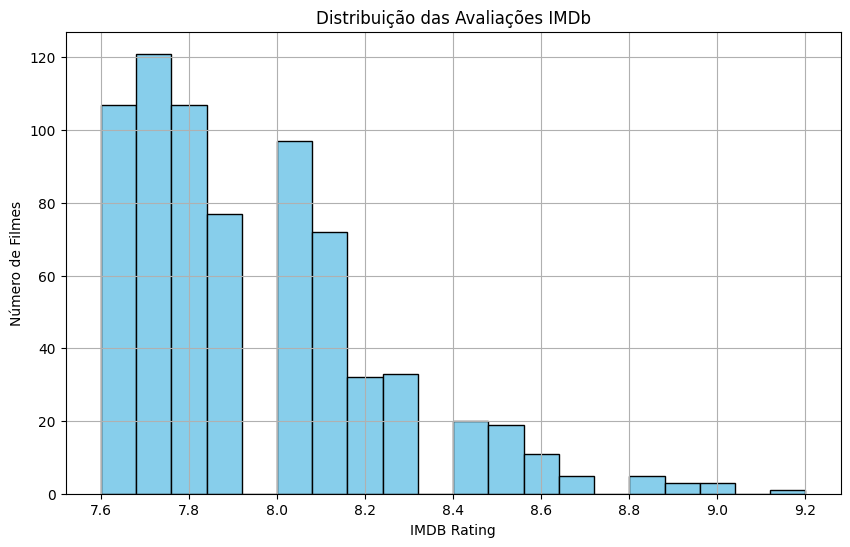

In [11]:
# Criando um gráfico de distribuição (histograma) das avaliações no IMDB
plt.figure(figsize=(10, 6))
plt.hist(imdb['IMDB_Rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('IMDB Rating')
plt.ylabel('Número de Filmes')
plt.title('Distribuição das Avaliações IMDb')
plt.grid(True)
plt.show()

## Quais são os 5 gêneros de filmes com a maior média de pontuação no IMDb e qual é a média de faturamento?

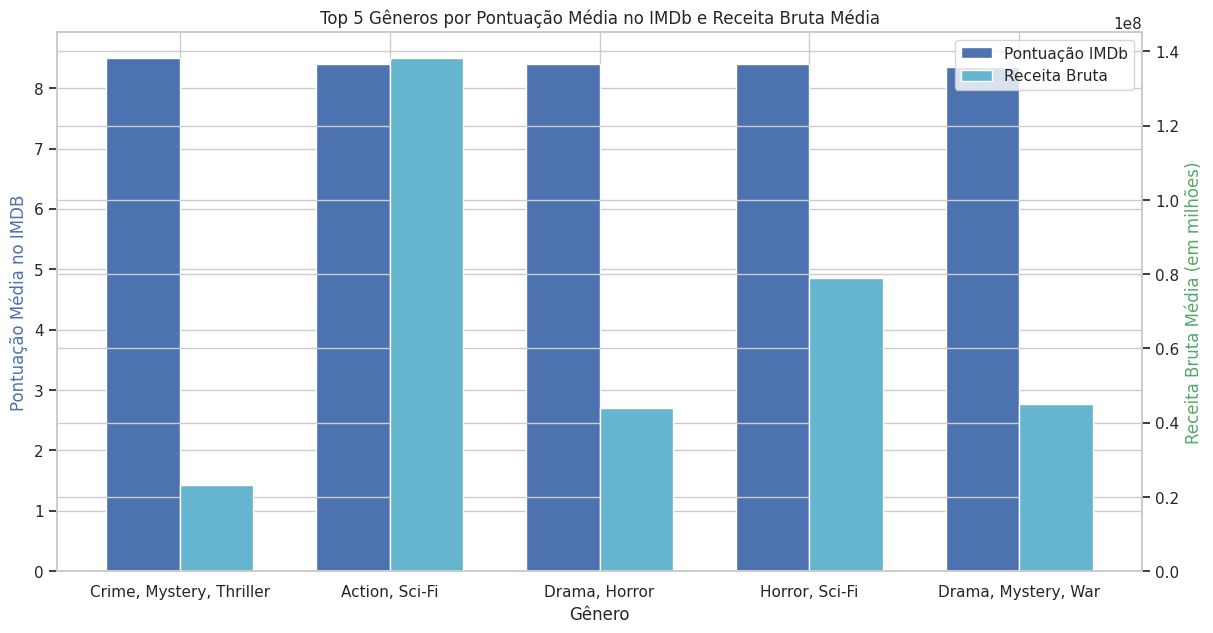

In [12]:
# Agrupando por gênero e calculando a média das pontuações no IMDB e do faturamento
genre_grouped = imdb.groupby('Genre').agg({
    'IMDB_Rating': 'mean',
    'Gross': 'mean'
}).reset_index()

# Selecionando os 5 gêneros com maior pontuação no IMDB
top_genres = genre_grouped.nlargest(5, 'IMDB_Rating')

# Configurando o estilo do seaborn
sb.set(style="whitegrid")

# Criando a figura e os eixos
fig, ax1 = plt.subplots(figsize=(14, 7))

# Definindo a largura das barras
bar_width = 0.35

# Configurando a posição das barras no eixo x
index = np.arange(len(top_genres))

# Plotando as barras para IMDB_Rating
bar1 = ax1.bar(index, top_genres['IMDB_Rating'], bar_width, label='Pontuação IMDb', color='b')

# Criando um segundo eixo y para o faturamento
ax2 = ax1.twinx()

# Plotando as barras para Gross
bar2 = ax2.bar(index + bar_width, top_genres['Gross'], bar_width, label='Receita Bruta', color='c')

# Configurando os rótulos e título do gráfico
ax1.set_xlabel('Gênero')
ax1.set_ylabel('Pontuação Média no IMDB', color='b')
ax2.set_ylabel('Receita Bruta Média (em milhões)', color='g')
ax1.set_title('Top 5 Gêneros por Pontuação Média no IMDb e Receita Bruta Média')

# Configurando os rótulos das categorias no eixo x
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(top_genres['Genre'])

# Adicionando a legenda
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Mostrando o gráfico
plt.show()


## Quais são os filmes com maior nota do IMDb?

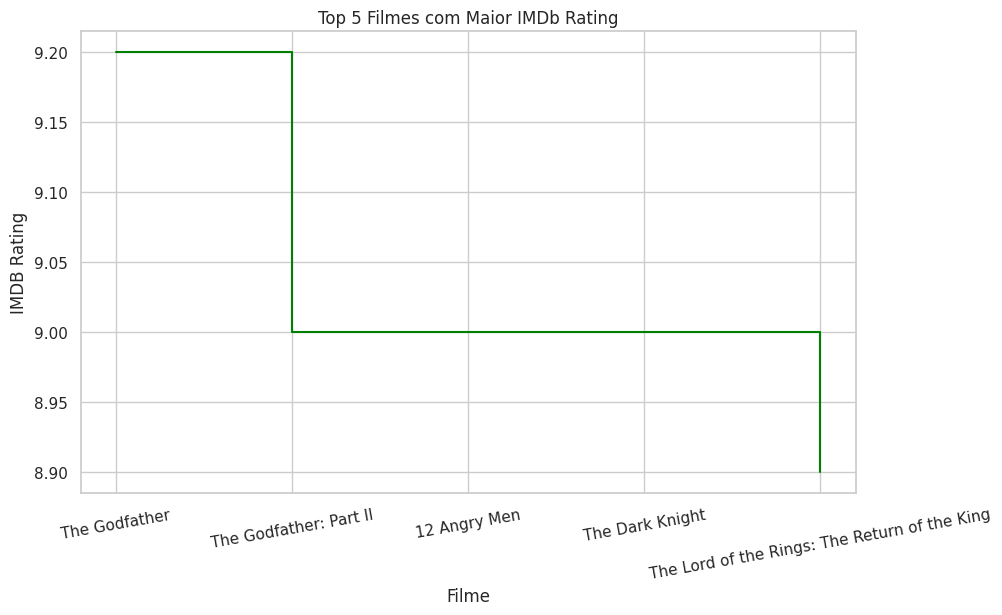

In [13]:
# Ordenando o DataFrame pelos filmes com maior IMDB_Rating
top_imdb_rating = imdb.sort_values(by='IMDB_Rating', ascending=False).head(5)

# Criando o gráfico de função de passos
plt.figure(figsize=(10, 6))
plt.step(top_imdb_rating['Series_Title'], top_imdb_rating['IMDB_Rating'], where='post', color='green')
plt.xlabel('Filme')
plt.ylabel('IMDB Rating')
plt.title('Top 5 Filmes com Maior IMDb Rating')
plt.xticks(rotation=10)
plt.grid(True)
plt.show()


## Quais são os atores em filmes com maior nota no IMDb?

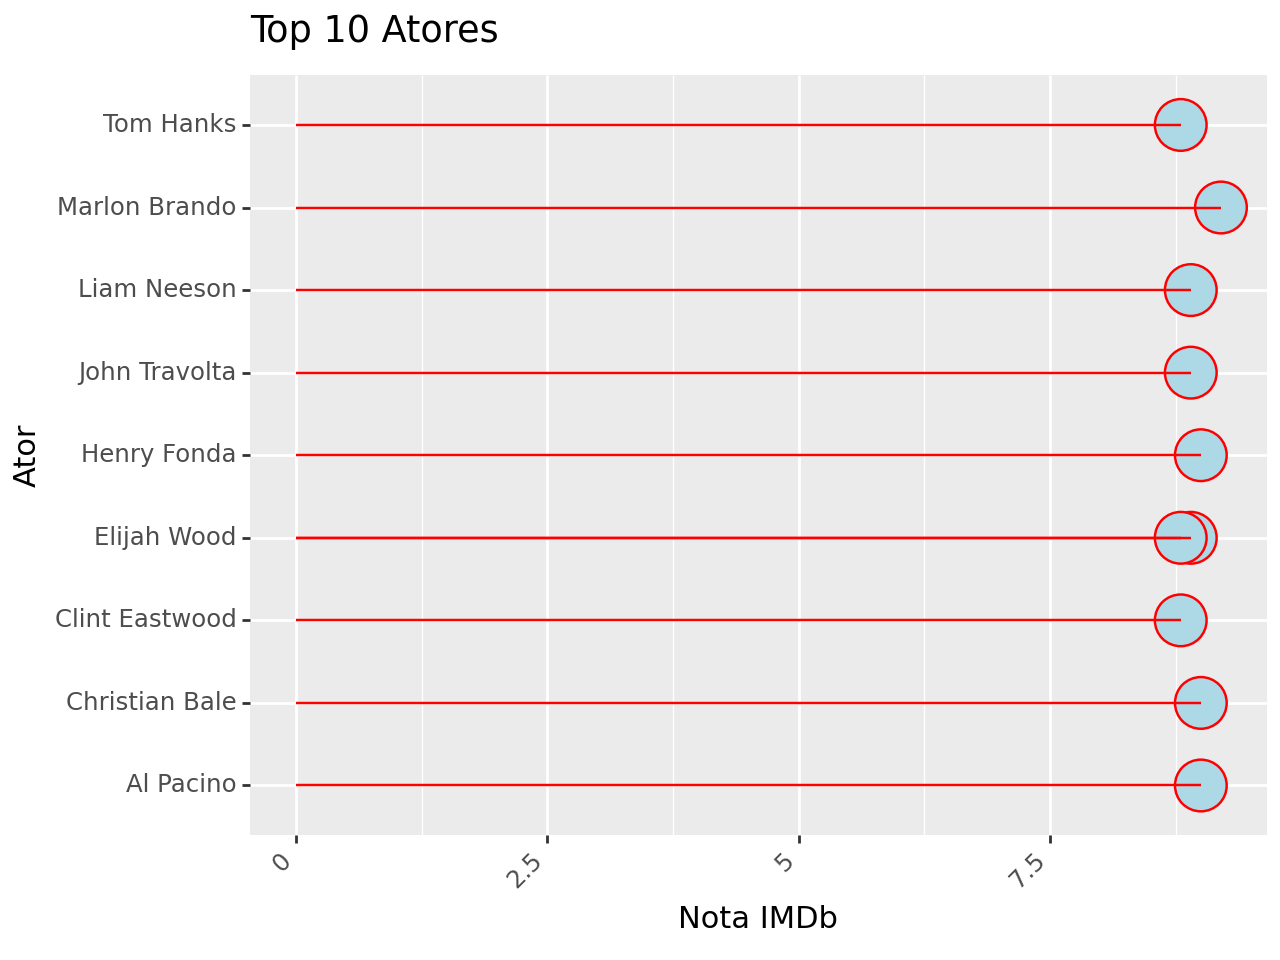

<Figure Size: (640 x 480)>

In [14]:
# Ordenando o DataFrame pelos atores com maior nota no IMDb
top_actors = imdb.sort_values(by='IMDB_Rating', ascending=False).head(10)

# Criando o gráfico de pirulito usando plotnine
(ggplot(top_actors, aes(x='Star1', y='IMDB_Rating')) +
 geom_point(size=10, color='red', fill='lightblue') +
 geom_segment(aes(x='Star1', xend='Star1', y=0, yend='IMDB_Rating'), color='red') +
 labs(title='Top 10 Atores',
      x='Ator', y='Nota IMDb') +
 theme(axis_text_x=element_text(angle=45, hjust=1)) +
 coord_flip()
)

## Qual o ator que mais fez filmes?

In [15]:
atores = pd.concat([imdb['Star1'], imdb['Star2'], imdb['Star3'], imdb['Star4']])

# Contando o número de filmes para cada ator
contagem_atores = atores.value_counts()

# Encontrando o ator com mais filmes
ator_mais_filmes = contagem_atores.idxmax()
numero_filmes = contagem_atores.max()

print(f'O ator que mais fez filmes é {ator_mais_filmes}, com um total de {numero_filmes} filmes.')

O ator que mais fez filmes é Robert De Niro, com um total de 16 filmes.


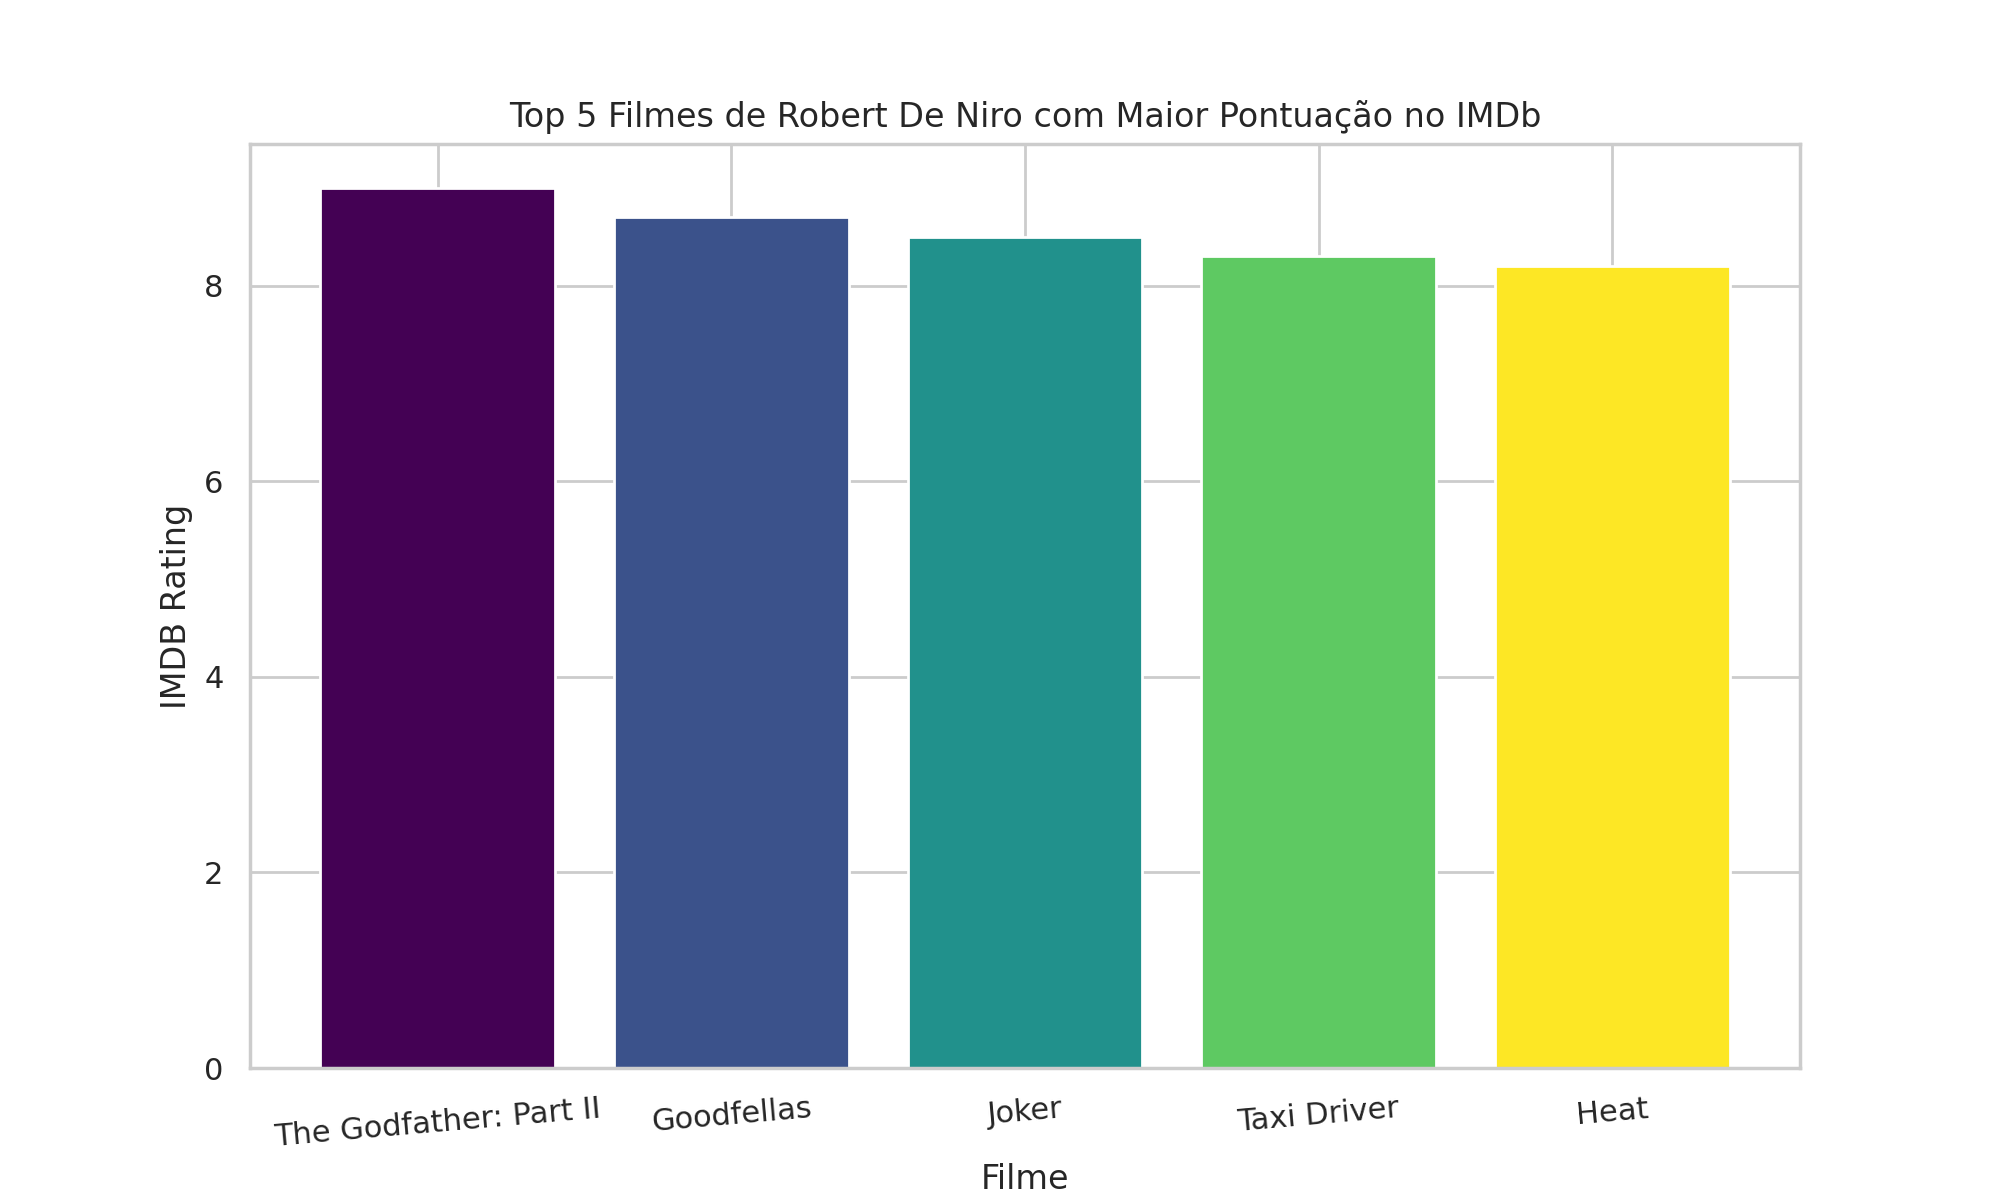

In [16]:
# Filtrando os filmes onde Robert De Niro é uma das estrelas
filmes_robert_de_niro = imdb[(imdb['Star1'] == 'Robert De Niro') |
                              (imdb['Star2'] == 'Robert De Niro') |
                              (imdb['Star3'] == 'Robert De Niro') |
                              (imdb['Star4'] == 'Robert De Niro')]

# Ordenando os filmes por IMDB_Rating em ordem decrescente e selecionar os top 5
top_filmes_robert_de_niro = filmes_robert_de_niro.sort_values(by='IMDB_Rating', ascending=False).head(5)

# Criando uma paleta de cores viridis com cores complementares
cores = plt.cm.viridis(np.linspace(0, 1, len(top_filmes_robert_de_niro)))

# Criando o gráfico de barras com cores da paleta
plt.figure(figsize=(10, 6))
bars = plt.bar(top_filmes_robert_de_niro['Series_Title'], top_filmes_robert_de_niro['IMDB_Rating'], color=cores)
plt.xlabel('Filme')
plt.ylabel('IMDB Rating')
plt.title('Top 5 Filmes de Robert De Niro com Maior Pontuação no IMDb')
plt.xticks(rotation=5)
plt.grid(True)

plt.show()



## Quais são os 5 diretores cujos filmes têm a maior média de nota do IMDb e qual é a média de faturamento desses filmes?

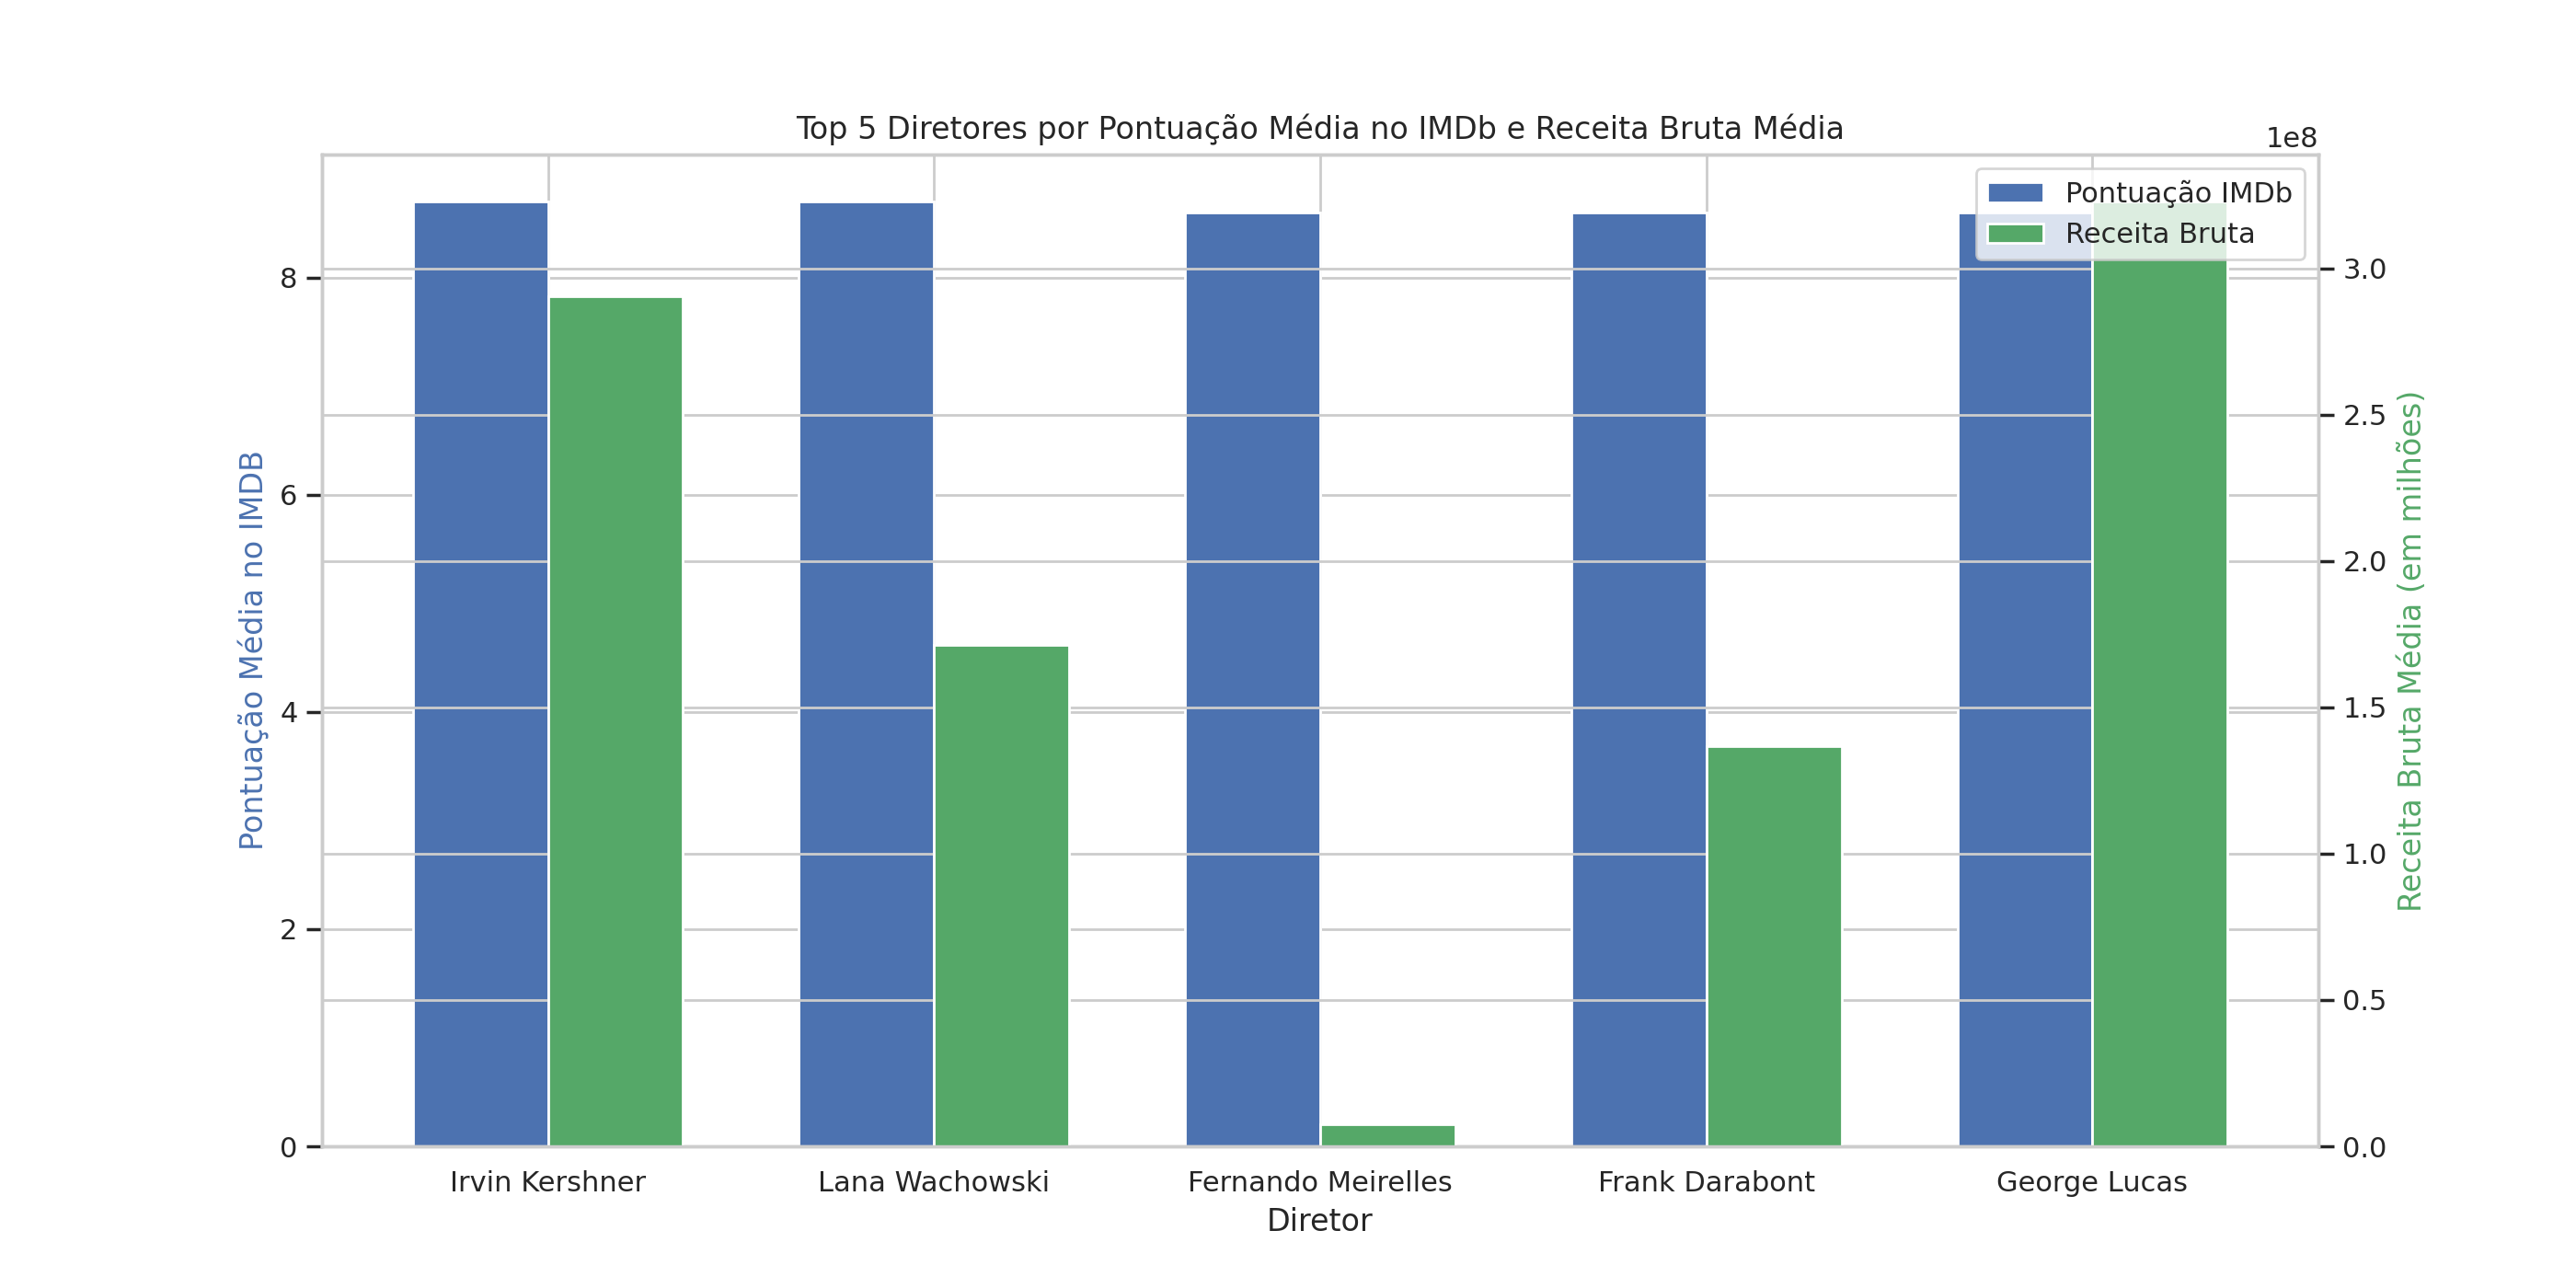

In [17]:
# Agrupando por diretor e calculando a média das pontuações no IMDB e do faturamento
director_grouped = imdb.groupby('Director').agg({
    'IMDB_Rating': 'mean',
    'Gross': 'mean'
}).reset_index()

# Selecionando os 5 diretores com maior pontuação no IMDB
top_directors = director_grouped.nlargest(5, 'IMDB_Rating')

# Configurando o estilo do seaborn
sb.set(style="whitegrid")

# Criando a figura e os eixos
fig, ax1 = plt.subplots(figsize=(14, 7))

# Definindo a largura das barras
bar_width = 0.35

# Configurando a posição das barras no eixo x
index = np.arange(len(top_directors))

# Plotando as barras para IMDB_Rating
bar1 = ax1.bar(index, top_directors['IMDB_Rating'], bar_width, label='Pontuação IMDb', color='b')

# Criando um segundo eixo y para o faturamento
ax2 = ax1.twinx()

# Plotando as barras para Gross
bar2 = ax2.bar(index + bar_width, top_directors['Gross'], bar_width, label='Receita Bruta', color='g')

# Configurando os rótulos e título do gráfico
ax1.set_xlabel('Diretor')
ax1.set_ylabel('Pontuação Média no IMDB', color='b')
ax2.set_ylabel('Receita Bruta Média (em milhões)', color='g')
ax1.set_title('Top 5 Diretores por Pontuação Média no IMDb e Receita Bruta Média')

# Configurando os rótulos das categorias no eixo x
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(top_directors['Director'])

# Adicionando a legenda
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Mostrando o gráfico
plt.show()

## Quantos filmes foram dirigidos por esses diretores e quais são eles?

In [18]:
# Lista de diretores que queremos analisar
diretores = ['Irvin Kershner', 'Lana Wachowski', 'Fernando Meirelles', 'Frank Darabont', 'George Lucas']

# Dicionário para armazenar contagem de filmes por diretor
contagem_filmes = {}

# Listas para armazenar os filmes de cada diretor
filmes_por_diretor = {diretor: [] for diretor in diretores}

# Iterando sobre o DataFrame para contar e listar os filmes por diretor
for index, row in imdb.iterrows():
    diretor = row['Director']
    titulo_filme = row['Series_Title']

    if diretor in diretores:
        if diretor in contagem_filmes:
            contagem_filmes[diretor] += 1
        else:
            contagem_filmes[diretor] = 1

        filmes_por_diretor[diretor].append(titulo_filme)

# Imprimindo a contagem de filmes por diretor
for diretor, filmes in contagem_filmes.items():
    print(f"{diretor} dirigiu {filmes} filmes.")

# Imprimindo os filmes de diretores específicos
for diretor in diretores:
    print(f"Filmes de {diretor}:")
    for filme in filmes_por_diretor[diretor]:
        print(f"- {filme}")
    print()


Lana Wachowski dirigiu 1 filmes.
Irvin Kershner dirigiu 1 filmes.
Fernando Meirelles dirigiu 1 filmes.
Frank Darabont dirigiu 1 filmes.
George Lucas dirigiu 1 filmes.
Filmes de Irvin Kershner:
- Star Wars: Episode V - The Empire Strikes Back

Filmes de Lana Wachowski:
- The Matrix

Filmes de Fernando Meirelles:
- Cidade de Deus

Filmes de Frank Darabont:
- The Green Mile

Filmes de George Lucas:
- Star Wars



## Qual diretor tem o maior número de filmes produzidos?

In [19]:
# Contando o número de filmes para cada diretor
contagem_diretores = imdb['Director'].value_counts()

# Encontrando o diretor com mais filmes
diretor_mais_filmes = contagem_diretores.idxmax()
total_filmes = contagem_diretores.max()

print(f"O diretor que mais tem filmes é '{diretor_mais_filmes}', com um total de {total_filmes} filmes.")

O diretor que mais tem filmes é 'Steven Spielberg', com um total de 13 filmes.


## Qual a média da nota do IMDb dos filmes dirigidos por Steven Spielberg?

In [20]:
# Filtrando os filmes dirigidos por Steven Spielberg
filmes_spielberg = imdb[imdb['Director'] == 'Steven Spielberg']

# Calculando a média da nota do IMDB dos filmes dele
media_imdb_spielberg = filmes_spielberg['IMDB_Rating'].mean()

print(f"A média da nota do IMDB dos filmes dirigidos por Steven Spielberg é {media_imdb_spielberg:.2f}.")


A média da nota do IMDB dos filmes dirigidos por Steven Spielberg é 8.03.


## Quais são os 5 filmes dirigidos por Steven Spielberg com a maior pontuação no IMDb?

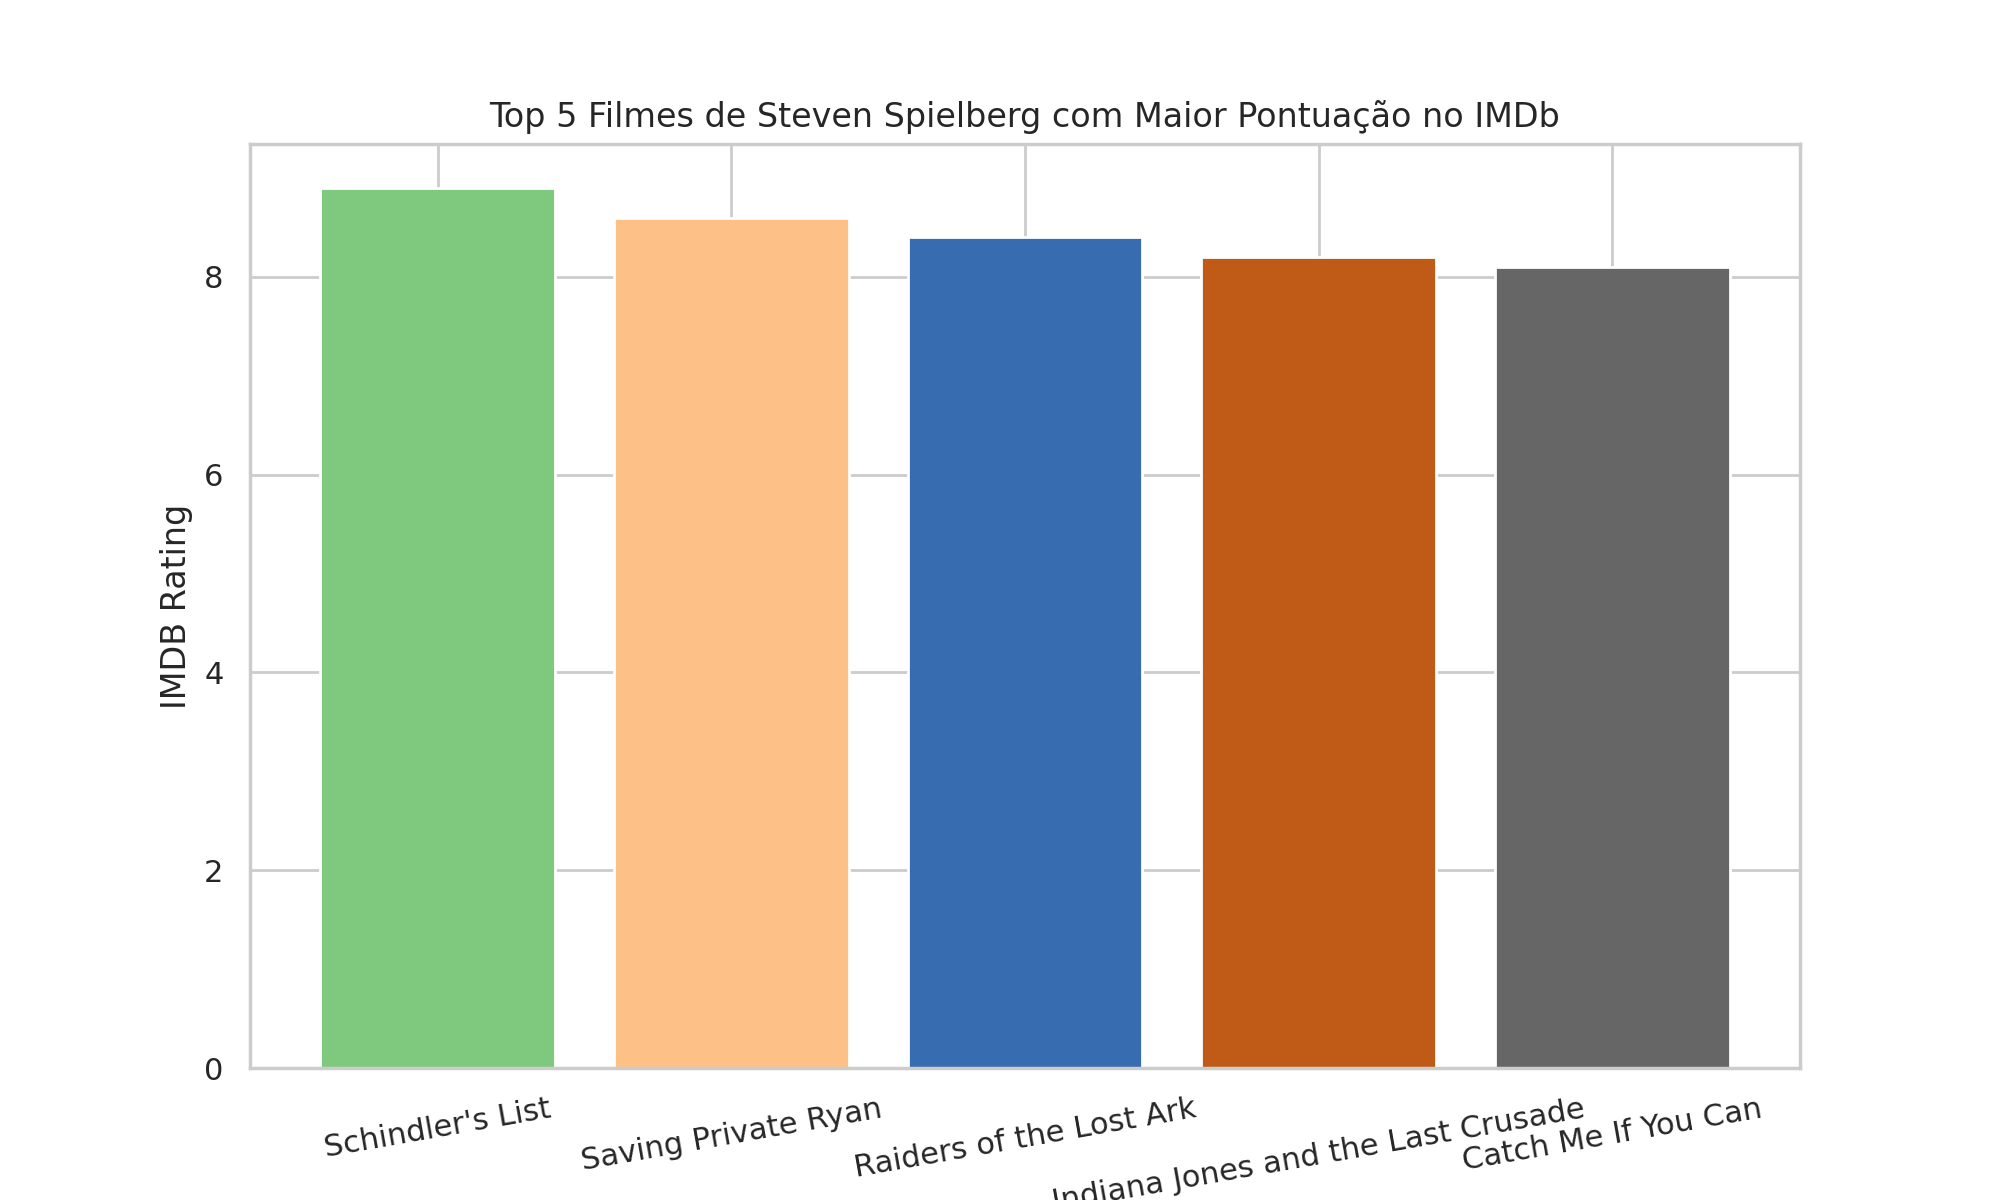

In [21]:
# Filtrando os filmes dirigidos por Steven Spielberg
filmes_spielberg = imdb[imdb['Director'] == 'Steven Spielberg']

# Ordenando os filmes por IMDB_Rating em ordem decrescente e selecionar os top 5
top_filmes_spielberg = filmes_spielberg.nlargest(5, 'IMDB_Rating')

# Criando uma paleta de cores
cores = plt.cm.Accent(np.linspace(0, 1, len(top_filmes_spielberg)))

# Criando o gráfico de barras com cores diferentes para cada barra
plt.figure(figsize=(10, 6))
bars = plt.bar(top_filmes_spielberg['Series_Title'], top_filmes_spielberg['IMDB_Rating'], color=cores)
plt.xlabel('Filme')
plt.ylabel('IMDB Rating')
plt.title('Top 5 Filmes de Steven Spielberg com Maior Pontuação no IMDb')
plt.xticks(rotation=10)
plt.grid(True)
plt.show()

## Qual filme você recomendaria para uma pessoa que você não conhece?

Primeiramente, eu consideraria a classificação etária para recomendar o filme adequado. Para adultos, indicaria "The Godfather", um clássico do cinema aclamado pela crítica e pelo público. Para adolescentes, sugiro "Jodaeiye Nader az Simin", um filme cativante que aborda temas universais de forma emocionante. Para crianças, "Bacheha-Ye aseman" é uma escolha excelente, conhecido por sua narrativa envolvente e visualmente cativante. E para todos os públicos, "Modern Times", um filme icônico de Charlie Chaplin que continua a encantar gerações com sua comédia atemporal e crítica social.

In [22]:
# Agrupando por faixa etária
faixa_etaria = imdb.groupby(['Certificate'])['Certificate'].count()
display(faixa_etaria)

Certificate
A           173
Approved      6
G             9
GP            1
PG           19
PG-13        38
Passed        9
R           131
TV-PG         1
U           183
U/A           1
UA          142
Name: Certificate, dtype: int64

In [23]:
# Função para encontrar o filme com maior IMDb Rating em cada grupo
def encontrar_maior_nota_por_grupo(df):
    # Agrupando por certificado e encontrar o índice do filme com a maior nota
    idx = df.groupby('Certificate')['IMDB_Rating'].idxmax()
    # Selecionando os filmes correspondentes aos índices encontrados
    return df.loc[idx]

# Simulação do agrupamento
faixa_etaria = imdb.groupby(['Certificate'])['Certificate'].count()
print("Número de filmes por certificado:")
print(faixa_etaria)
print()

# Encontrando e exibindo os filmes com maior IMDb Rating por grupo
filmes_maior_nota_por_grupo = encontrar_maior_nota_por_grupo(imdb)
print("Filmes com a maior avaliação no IMDb por certificado:")
print(filmes_maior_nota_por_grupo[['Certificate', 'Series_Title', 'IMDB_Rating']])


Número de filmes por certificado:
Certificate
A           173
Approved      6
G             9
GP            1
PG           19
PG-13        38
Passed        9
R           131
TV-PG         1
U           183
U/A           1
UA          142
Name: Certificate, dtype: int64

Filmes com a maior avaliação no IMDb por certificado:
    Certificate             Series_Title  IMDB_Rating
0             A            The Godfather          9.2
306    Approved          Ace in the Hole          8.1
50            G             Modern Times          8.5
990          GP           Kelly's Heroes          7.6
99           PG        Bacheha-Ye aseman          8.3
88        PG-13  Jodaeiye Nader az Simin          8.3
122      Passed         Double Indemnity          8.3
23            R      Saving Private Ryan          8.6
348       TV-PG           Darbareye Elly          8.0
3             U             12 Angry Men          9.0
877         U/A                Searching          7.6
1            UA          Th

Classificações Indicativas e Faixas Etárias de Filmes:

- Para Adultos (A):
Filmes com conteúdo adulto, como linguagem forte, violência intensa ou temas maduros. Não recomendado para menores de 18 anos.

- Para Crianças (G, U):
Filmes adequados para todas as idades. Não contêm material que possa assustar ou ser inapropriado para crianças pequenas.

- Para Adolescentes (PG-13, U/A, UA):
Filmes que podem conter algum material inapropriado para crianças menores de 13 anos, como violência moderada, linguagem forte ou temas sugestivos. U/A e UA indicam que crianças abaixo de certa idade precisam de orientação dos pais.

- Para Todos (G, PG, Passed):
Filmes adequados para todas as idades. Podem conter algum conteúdo que necessite da orientação dos pais para crianças menores.

## Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

Para analisar isso, plotei um gráfico de dispersão com a receita bruta (Gross) no eixo x e a nota do IMDB no eixo y. No gráfico, identifiquei alguns outliers, que são pontos de dados que se destacam significativamente do padrão geral dos dados, podendo indicar casos excepcionais. No entanto, os fatores que podem estar relacionados com altas expectativas de faturamento incluem gêneros cinematográficos populares, diretores renomados e atores de destaque, que têm influência significativa na recepção e sucesso comercial de um filme.


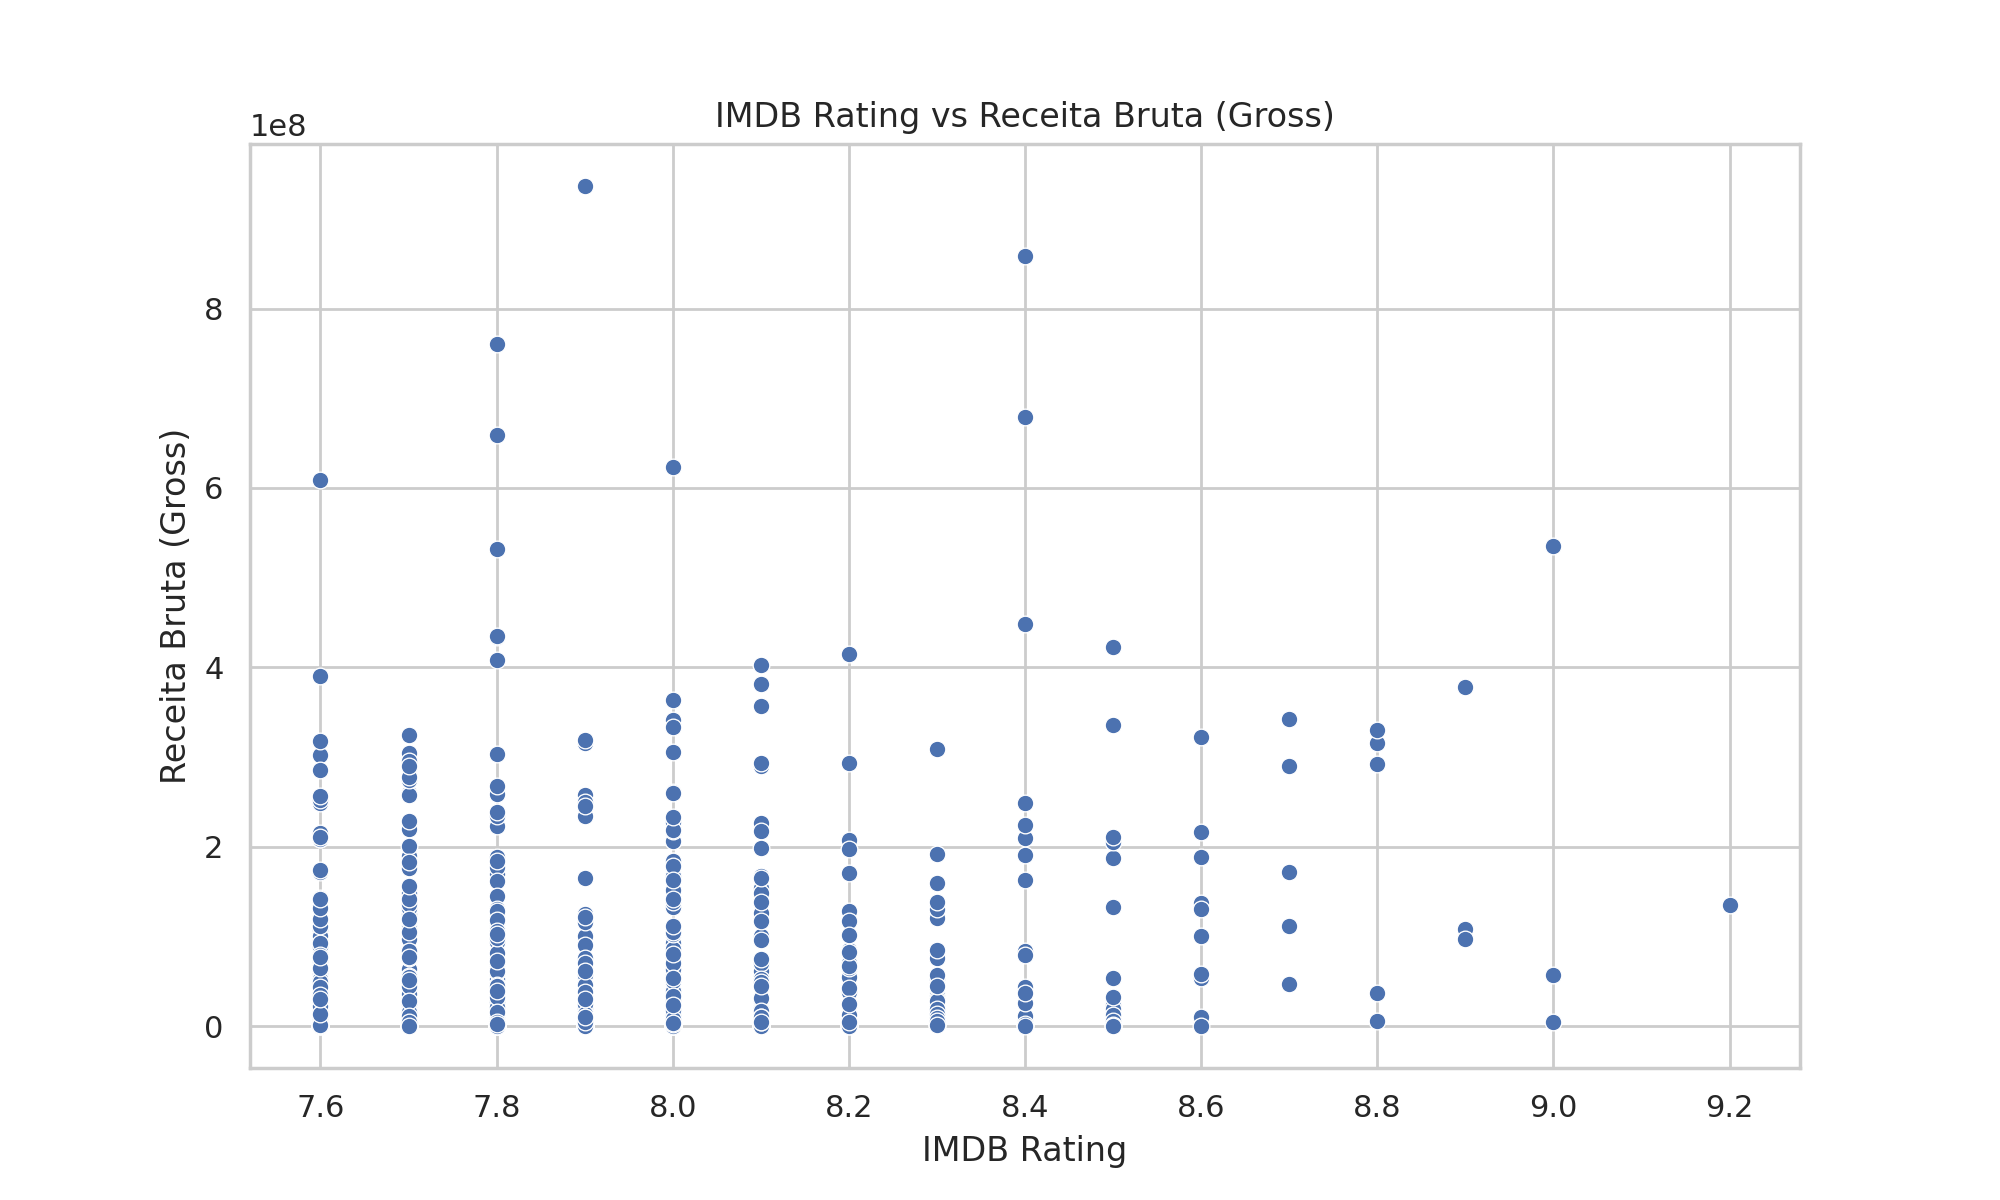

In [24]:
# Criando gráfico de faturamento vs notas do imdb
plt.figure(figsize=(10, 6))
sb.scatterplot(x='IMDB_Rating', y='Gross', data=imdb)
plt.title('IMDB Rating vs Receita Bruta (Gross)')
plt.xlabel('IMDB Rating')
plt.ylabel('Receita Bruta (Gross)')
plt.grid(True)
plt.show()

## Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

A coluna Overview permite a aplicação de Processamento de Linguagem Natural (PLN), que é uma técnica para análise e interpretação de texto. Através do resumo do filme, podemos identificar o gênero ao qual ele pertence. Utilizei uma nuvem de palavras para visualizar as palavras mais frequentes. E criei outra para o gênero 'Action, Adventure, Drama', explorei as palavras mais relevantes para compreender melhor o contexto e os temas predominantes do filme.

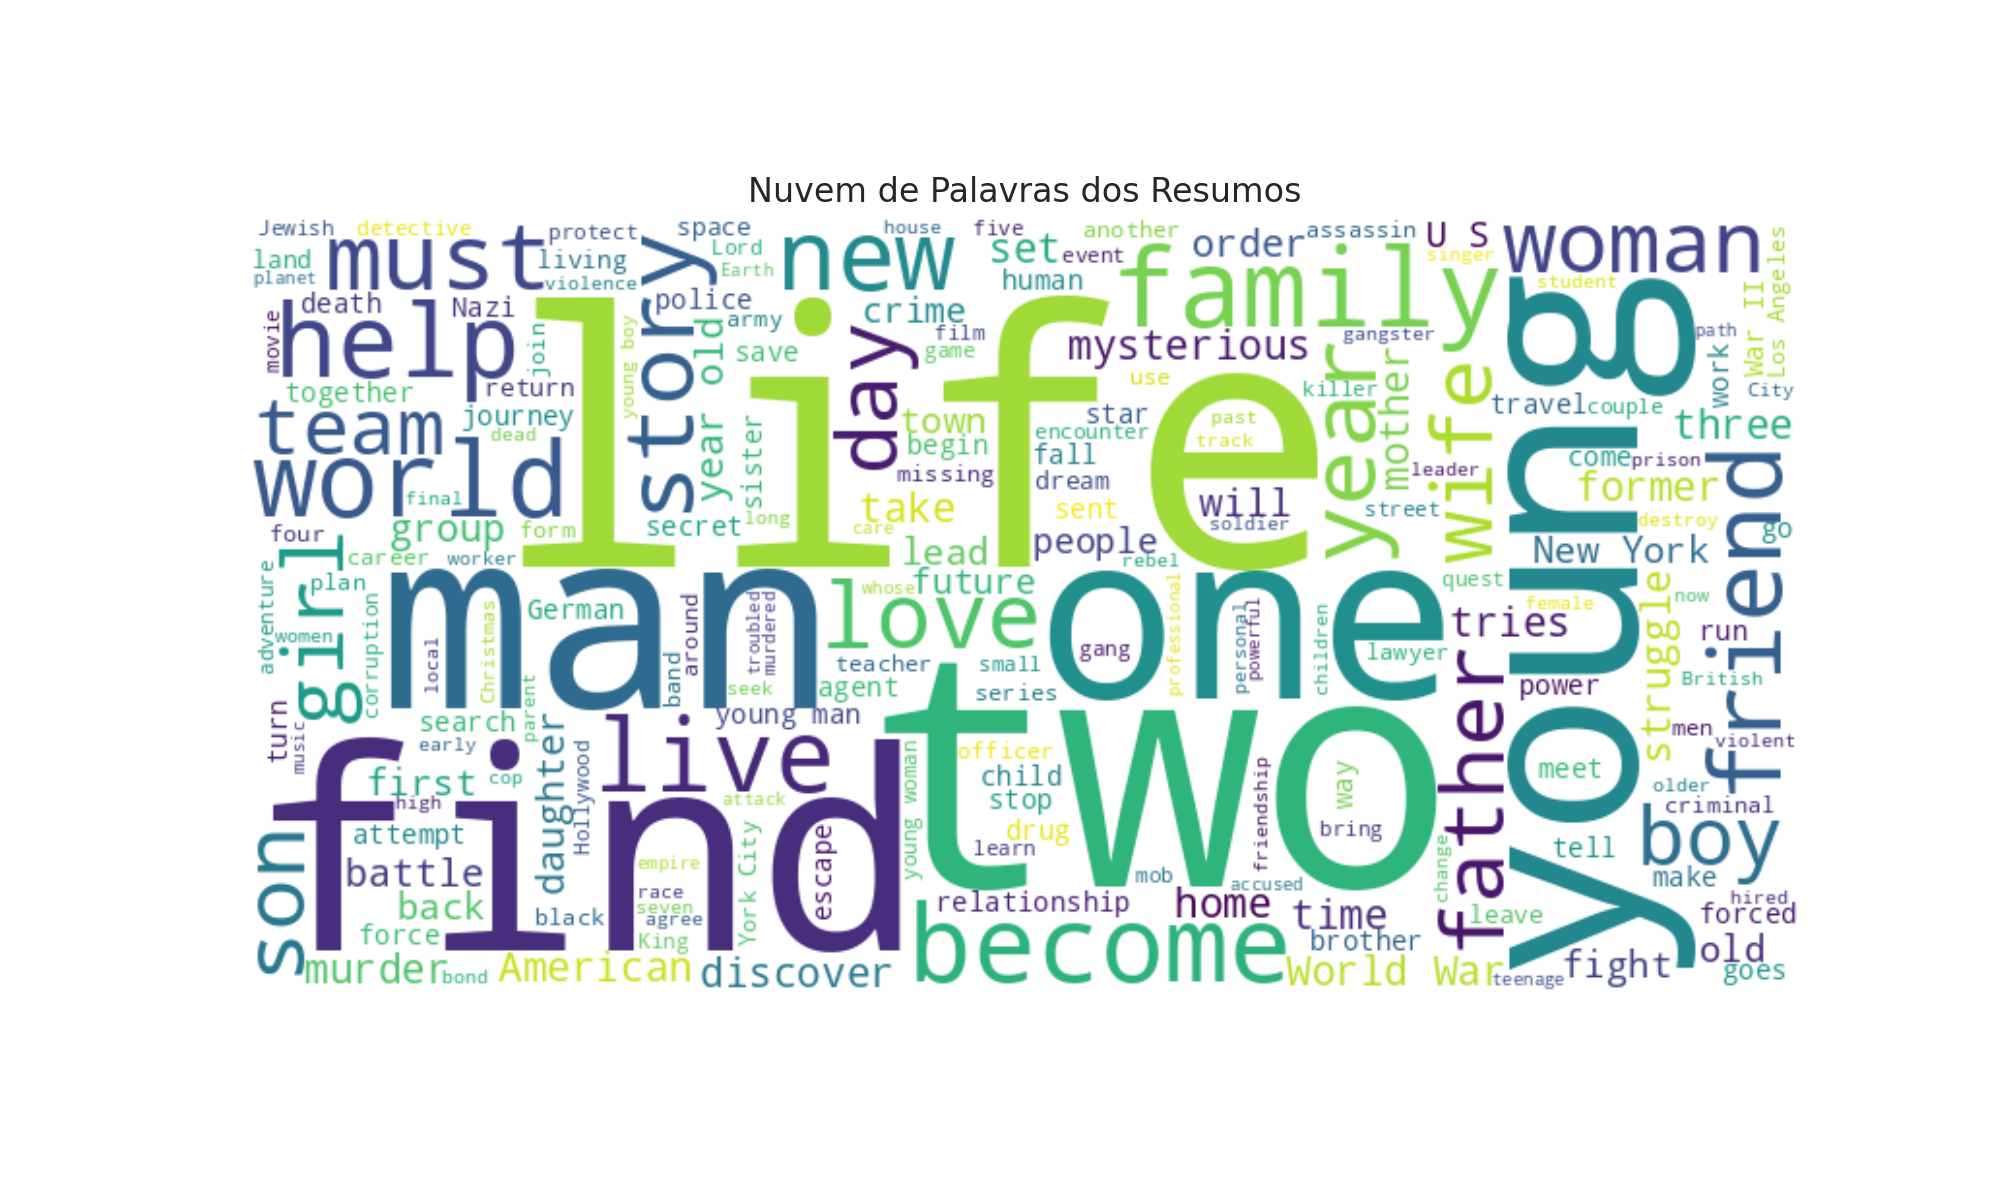

Top 5 palavras-chave para o gênero 'Crime, Drama': [('a', 27), ('and', 24), ('the', 17), ('to', 15), ('of', 14)]
Top 5 palavras-chave para o gênero 'Action, Crime, Drama': [('the', 25), ('a', 22), ('to', 16), ('of', 13), ('and', 12)]
Top 5 palavras-chave para o gênero 'Action, Adventure, Drama': [('the', 24), ('of', 14), ('and', 13), ('a', 11), ('to', 9)]
Top 5 palavras-chave para o gênero 'Biography, Drama, History': [('the', 39), ('of', 28), ('and', 14), ('a', 12), ('his', 11)]
Top 5 palavras-chave para o gênero 'Action, Adventure, Sci-Fi': [('the', 34), ('a', 31), ('to', 27), ('of', 19), ('an', 15)]
Top 5 palavras-chave para o gênero 'Drama': [('a', 66), ('the', 55), ('of', 46), ('and', 44), ('to', 42)]
Top 5 palavras-chave para o gênero 'Drama, Romance': [('a', 29), ('the', 26), ('and', 25), ('of', 24), ('in', 19)]
Top 5 palavras-chave para o gênero 'Western': [('a', 10), ('in', 4), ('the', 4), ('joins', 3), ('to', 3)]
Top 5 palavras-chave para o gênero 'Action, Sci-Fi': [('to', 7)

In [25]:
# Criando nuvem de palavras para a coluna Overview
from wordcloud import WordCloud
from collections import Counter

# Concatenando todos os resumos em uma string única
all_overviews = ' '.join(imdb['Overview'])

# Gerando uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_overviews)

# Mostrando a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras dos Resumos')
plt.show()

# Contagem de palavras-chave por gênero
genres = imdb['Genre'].unique()
for genre in genres:
    subset = imdb[imdb['Genre'] == genre]
    all_overviews_genre = ' '.join(subset['Overview'])
    word_counts = Counter(all_overviews_genre.split())
    top_words = word_counts.most_common(5)
    print(f"Top 5 palavras-chave para o gênero '{genre}': {top_words}")


In [26]:
# Agrupando gênero dos filmes
genero_filme = imdb.groupby(['Genre'])['Genre'].count()
display(genero_filme)

Genre
Action, Adventure              5
Action, Adventure, Comedy      7
Action, Adventure, Drama      12
Action, Adventure, Family      1
Action, Adventure, Fantasy     6
                              ..
Horror, Thriller               1
Mystery, Romance, Thriller     1
Mystery, Sci-Fi, Thriller      2
Mystery, Thriller              4
Western                        4
Name: Genre, Length: 172, dtype: int64

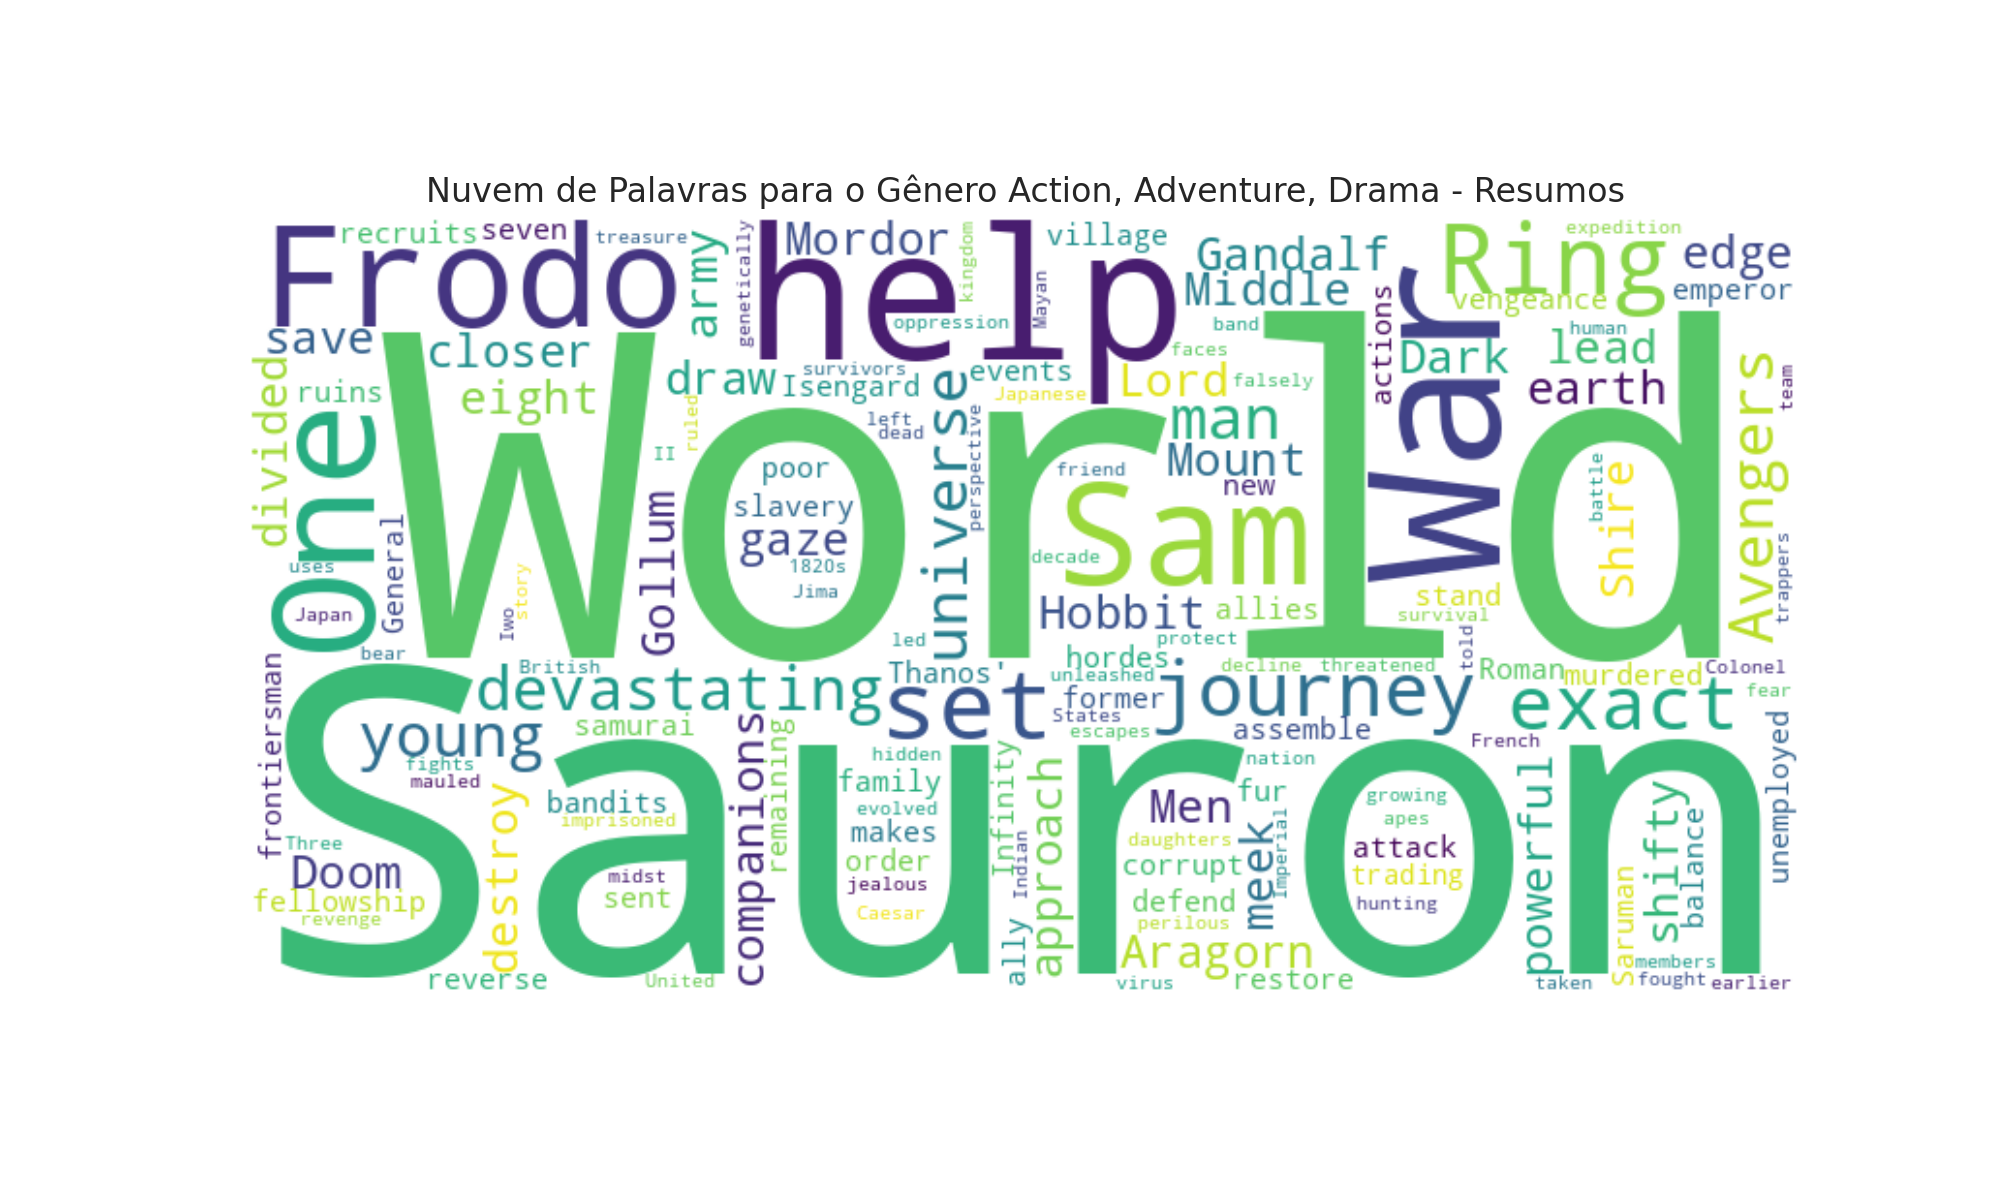

In [27]:
# Filtrando do DataFrame para incluir apenas o gênero 'Action, Adventure, Drama'
genero_especifico = imdb[imdb['Genre'] == 'Action, Adventure, Drama']

# Concatenando todos os resumos do gênero específico em uma única string
all_overviews_genero = ' '.join(genero_especifico['Overview'])

# Gerando uma nuvem de palavras para o gênero específico
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_overviews_genero)

# Configurações do gráfico
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras para o Gênero Action, Adventure, Drama - Resumos')
plt.show()


# Modelo Preditivo

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import joblib

# Selecionar as variáveis preditoras e a variável alvo
X = imdb[['Meta_score', 'No_of_Votes', 'Genre', 'Certificate']]
y = imdb['IMDB_Rating']

# Aplicar one-hot encoding nas variáveis categóricas (Genre e Certificate)
X_encoded = pd.get_dummies(X, columns=['Genre', 'Certificate'], drop_first=True)

# Dividir os dados em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Criar o modelo de Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo com os dados de treino
model_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model_rf.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro Quadrático Médio (MSE): {mse:.4f}')
print(f'Coeficiente de Determinação (R²): {r2:.4f}')

# Salvar o modelo treinado no formato .pkl
joblib.dump(model_rf, 'random_forest_regressor_model.pkl')


Erro Quadrático Médio (MSE): 0.0435
Coeficiente de Determinação (R²): 0.4591


['random_forest_regressor_model.pkl']

## Supondo um filme com as seguintes características. Qual seria a nota do IMDB?


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dados do filme
filme = {
    'Meta_score': [80.0],
    'No_of_Votes': [2343110]
}

# Converter para DataFrame
df_filme = pd.DataFrame(filme)

# Selecionar as variáveis preditoras e a variável alvo
X = imdb[['Meta_score', 'No_of_Votes']]
y = imdb['IMDB_Rating']

# Tratamento de dados (como one-hot encoding para variáveis categóricas se aplicável)

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo de regressão linear
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model_lr.predict(X_test)

# Avaliar o desempenho do modelo (por exemplo, MSE, R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro Quadrático Médio (MSE): {mse:.4f}')
print(f'Coeficiente de Determinação (R²): {r2:.4f}')

# Fazer previsão para um novo filme
X_movie = df_filme  # Meta_score e No_of_Votes do novo filme
imdb_rating_pred = model_lr.predict(X_movie)

print(f'A nota prevista do IMDB para o filme com as características fornecidas é: {imdb_rating_pred[0]:.2f}')


Erro Quadrático Médio (MSE): 0.0443
Coeficiente de Determinação (R²): 0.4485
A nota prevista do IMDB para o filme com as características fornecidas é: 8.96
